# Análise exploratória de dados

In [1]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Leitura do conjunto de dados

In [2]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## 2. Descrição dos dados

![](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

**Palmer Archipelago (Antartica) penguin data** é um conjunto de dados com informações sobre pinguins do [arquipélago palmer](https://pt.wikipedia.org/wiki/Arquip%C3%A9lago_Palmer), na antártica. Tais dados foram coletados e disponibilizados pela [Dra. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) e pela [Estação Palmer, Antarctica LTER](https://pal.lternet.edu/), membro da [Long Term Ecological Research Network](https://lternet.edu/).

Tal conjunto de dados pode ser utilizado em tarefas de aprendizado de máquina supervisionado em tarefas de classificação, sendo `species`, a variável dependente e o restante utilizado como variáveis preditoras.

### 2.1. Dicionário de dados

In [3]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,species,Nome da espécie,qualitativa,nominal
1,island,Nome da ilha onde foi feita a medição,qualitativa,nominal
2,bill_length_mm,Comprimento de bico,quantitativa,continua
3,bill_depth_mm,Profundidade (altura) de bico,quantitativa,continua
4,flipper_length_mm,Comprimento de nadadeira,quantitativa,continua
5,body_mass_g,Massa corporal (peso),quantitativa,continua
6,sex,Sexo dos indivíduos,qualitativa,nominal


---
 - São 7 variáveis, com 3 qualitativas nominais e 4 quantitativas contínuas.
---

## 3. Perguntas de partida e hipóteses
 - Existem dados faltantes, se sim quantos e em quais variáveis?
 - Qual a distribuição dos dados (variável por variável)?
 - Existe alguma relação entre o sexo, espécie e as características físicas dos pinguins?
 - Existe alguma relação entre a ilha, espécie e as características físicas dos pinguins?
 - Existem correlações entre estas características físicas?

### Existem dados faltantes, se sim quantos e em quais variáveis?

In [4]:
# colunas (variáveis) contendo valores valtantes
number_of_na_by_column = df.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows = df.isnull().any(axis=1).sum()

display(number_of_na_by_column)
display(Markdown(
    "---\n"
    f"A partir dessa informação sabemos que as variáveis `{number_of_na_by_column.axes[0].to_list()}`"
    f"contém valores faltantes. Além disso sabemos que temos `{number_of_na_rows}` linhas com valores faltantes."
    "As próximas análises aqui serão realizadas sem considerar os dados faltantes"
    "\n\n ---"
))

df.dropna(inplace=True)

bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

---
A partir dessa informação sabemos que as variáveis `['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']`contém valores faltantes. Além disso sabemos que temos `11` linhas com valores faltantes.As próximas análises aqui serão realizadas sem considerar os dados faltantes

 ---

### Qual a distribuição dos dados (variável por variável)?

Iniciaremos com as estatísticas descritivas e posteriormente com visualizações das distribuições.

In [5]:
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333,333,333.000000,333.000000,333.000000,333.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,146,163,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN


---
 - Existem três possíveis espécies, três possíveis ilhas.
 - A espécie mais frequente é a Adelie
 - A Ilha com mais instâncias é a Biscoe
 - O sexo mais frequente é o Masculino (`Male`)
 - O comprimento médio dos bicos (`bill_length_mm`) é de 44mm, com um mínimo de 32mm e máximo de 59mm, aproximadamente
 - A profundidade média dos bicos (`bill_depth_mm`) é de 17mm, com um mínimo de 13mm e máximo de 21mm, aproximadamente
 - O comprimento médio das nadadeiras (`flipper_length_mm`) é de 200mm, com um mínimo de 172mm e máximo de 231mm, aproximadamente
 - As massas variam entre 2.7kg e 6.3kg, com média de 4.2kg
---

##### Distribuição das variáveis qualitativas

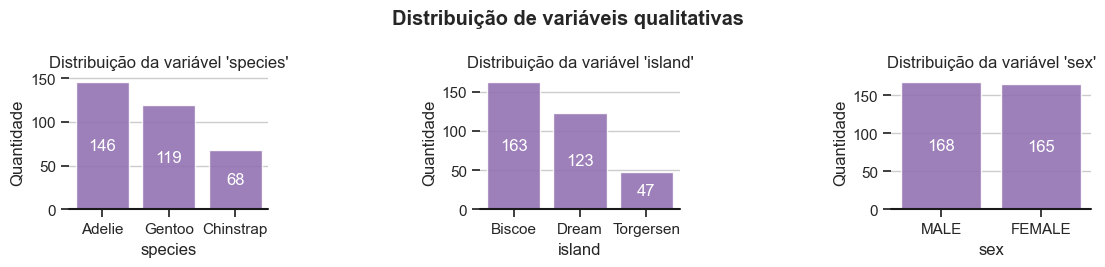

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(12,3))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'qualitativa'").variavel.to_list()):
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
        order=order
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()

---
 - A maioria dos pinguins são da espécie Adelie enquanto a minoria é da espécie Chinstrap;
 - O maior número de pinguins da análise é da ilha Biscoe e uma pequena parcela é da ilha Torgersen;
 - A distribuição do sexo está bastante balanceada.
---

##### Distribuição das variáveis quantitativas

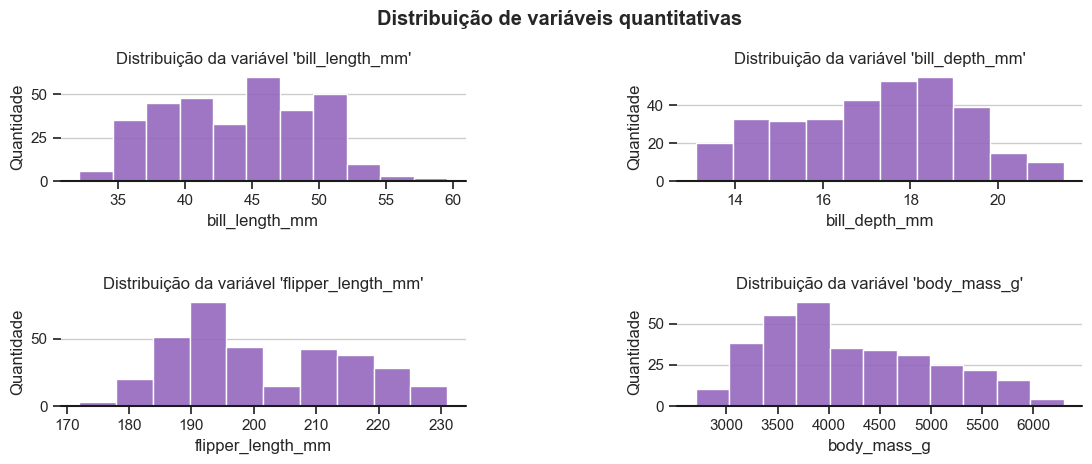

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12,5))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
    # Customize grid to show only vertical lines
plt.show()

---
A partir das visualizações acima podemos dizer que:
 - A distribuição da variável comprimento de bico está bem distribuída, com talvez 3 modas.
 - A distribuição da profundidade do bico tem valores mais frequentes próximos de 19.
 - A distribuição do comprimento da nadadeira tem duas modas, o que pode estar relacionado com espécies ou sexos dos pinguins.
 - A distribuição de massa dos pinguins tende a apresentar massas menores do que 4kg.
---

### Existe alguma relação entre o sexo, espécie e as características físicas dos pinguins?

As características físicas são: comprimento e profundidade do bico, comprimento da nadadeira e massa corporal

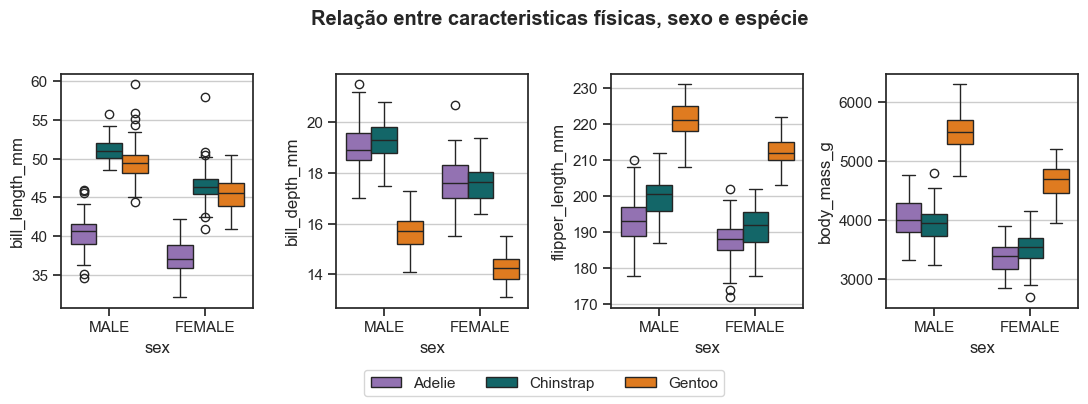

In [8]:
fig, axes = plt.subplots(1, 4, figsize=(12,4))
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Relação entre caracteristicas físicas, sexo e espécie', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.boxplot(
        x="sex", 
        y=variavel, 
        hue="species", 
        data=df, 
        ax=axes.flatten()[i]
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

---
 - Os pinguins machos apresentam valores maiores (em média) para todas as variáveis relacionadas a características corporais
 - A característica comprimento de bico apresenta alta variabilidade, com alguns outliers
 - As espécies Chinstrap e Gentoo são parecidas em relação ao comprimento de bico
 - As espécies Adelie e Chinstrap são parecidas em relação a profundidade de bico, comprimento da nadadeira e massa corporal
 - A espécie Gentoo apresenta maior massa, comprimento de nadadeira e comprimento de bico, enquanto que apresenta a menor profundidade de bico
---

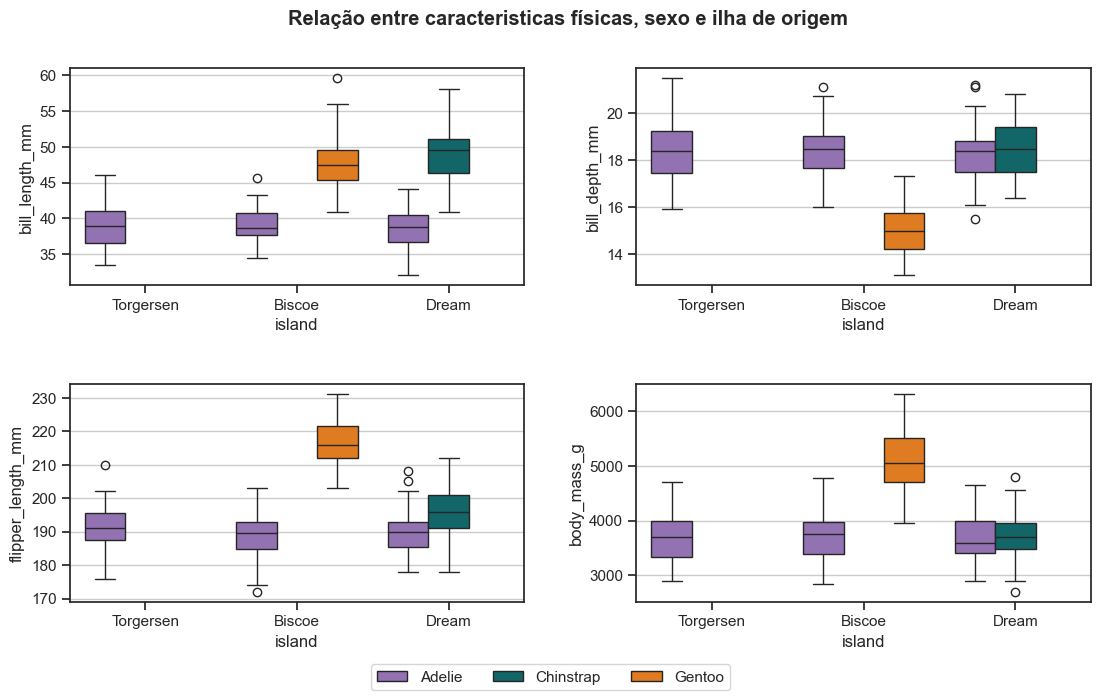

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12,7))
plt.tight_layout(pad=4, w_pad=4, h_pad=4)
fig.suptitle('Relação entre caracteristicas físicas, sexo e ilha de origem', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.boxplot(
        x="island", 
        y=variavel, 
        hue="species", 
        data=df, 
        ax=axes.flatten()[i],
    )
    ax.grid(axis='y', linestyle='-')
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

---
 - As características físicas parecem estar mais correlacionadas com a espécie do que com a ilha a qual o pinguim pertence
 - A espécie Adelie está presente em todas as ilhas
 - A espécie Chinstrap só está presente na ilha Dream
 - A espécie Gentoo só está presente na ilha Biscoe
---

### Existem correlações entre estas características físicas?

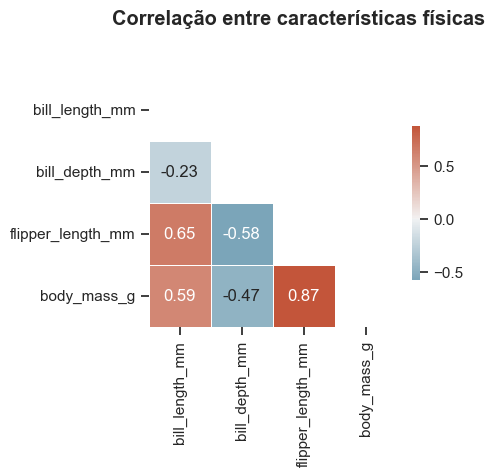

In [10]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(4,4))
# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True, 
    fmt=".2f"
)
ax.grid(False)

plt.suptitle(f"Correlação entre características físicas", fontweight='bold')
plt.show()

---
 - Existe alta correlação entre o comprimento da nadadeira e a massa dos pinguins
 - As correlações massa x comprimento do bico e comprimento da nadadeira x profundidade do bico são bem parecidas
 - As variáveis comprimento da nadadeira e comprimento do bico também apresentam uma correlação relativamente grande
---

> É importante notar que, como existem instâncias de categorias (espécies) diferentes, alguns dos valores de correlação encontrados (valores negeativos) no gráfico acima podem gerar conclusões falhas. Um gráfico que pode sanar esse tipo de falha é um gráfico combinado de dispersão com densidade.

In [ ]:
sns.pairplot(df, hue="species")
plt.show()

> Note que olhando espécie a espécie, não existe nenhuma correlação negativa entre as variáveis relacionadas a características físicas dos pinguins. Este fenômeno é o que chamamos de Paradoxo de Simpson


## 3. *Insights*

Com a ajuda das visualizações criadas, bem como da análise em relação ao dicionário de dados, as informações mais relevantes que conseguimos adquirir são:
 - A maioria dos pinguins são da espécie Adelie enquanto a minoria é da espécie Chinstrap;
 - O maior número de pinguins da análise é da ilha Biscoe e uma pequena parcela é da ilha Torgersen;
 - A distribuição do sexo está bastante balanceada.
 - A distribuição da variável comprimento de bico está bem distribuída, com talvez 3 modas.
 - A característica comprimento de bico apresenta alta variabilidade, com alguns outliers
 - As espécies Chinstrap e Gentoo são parecidas em relação ao comprimento de bico
 - As espécies Adelie e Chinstrap são parecidas em relação a profundidade de bico, comprimento da nadadeira e massa corporal
 - A espécie Gentoo apresenta maior massa, comprimento de nadadeira e comprimento de bico, enquanto que apresenta a menor profundidade de bico
 - As características físicas parecem estar mais correlacionadas com a espécie do que com a ilha a qual o pinguim pertence

## 4. Observação

Não são tiradas conclusões a respeito dos dados e/ou visualizações. Para tal, seria necessário o auxílio de algum especialista no assunto.